In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,confusion_matrix,roc_auc_score,accuracy_score, precision_score, f1_score, RocCurveDisplay)

In [44]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Customer Churn Distribution

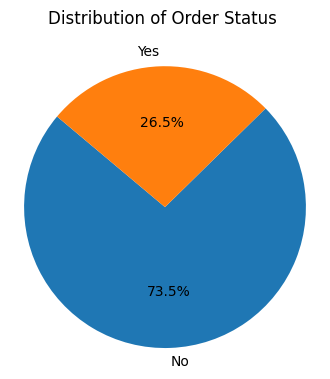

In [48]:
plt.figure(figsize=(4,4))
output_counts = df['Churn'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')

plt.show()

### Churn by Contract Type

<Axes: xlabel='Contract', ylabel='count'>

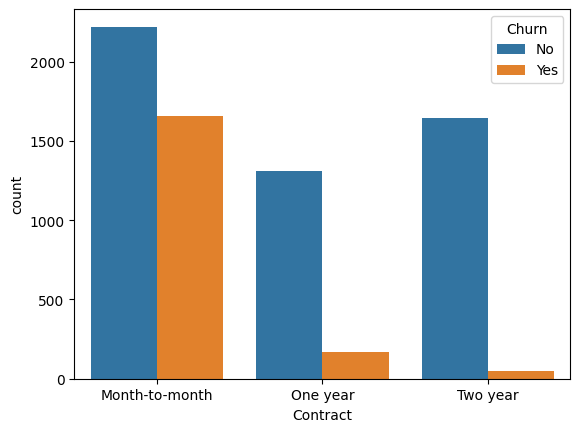

In [50]:
sns.countplot(x='Contract', hue='Churn', data=df)

In [51]:
customer_ids = df["customerID"]
df.drop(['customerID'],axis=1,inplace=True)

## Encoding Categorical Variables

In [52]:
# Binary columns (Yes/No → 1/0)
binary_cols = [
    "Partner", "Dependents", "PhoneService", "PaperlessBilling",
    "OnlineSecurity", "OnlineBackup", 
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})


In [53]:
# Ordinal encoding for 'Contract'
df["Contract"] = df["Contract"].map({
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2
})
# # Label Encoding for nominal categorical columns
nominal_cols = ["InternetService", "PaymentMethod","MultipleLines","gender"]
le = LabelEncoder()
for col in nominal_cols:
    df[col] = le.fit_transform(df[col])

In [54]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
# Convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Handle NaN safely
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

## Split data into features (X) and target (y).

In [56]:
X = df.drop('Churn', axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,1.0,0.0,1.0,1.0,0.0,0.0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2,70.70,151.65,Yes


### Random Forest Classifier

In [59]:
rf = RandomForestClassifier(
        n_estimators=300,     
        max_depth=None,          
        max_features='sqrt',    
        class_weight='balanced', 
        n_jobs=-1,               
        random_state=42
     )

rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

### Model Evaluation 

In [60]:
y_pred  = rf.predict(X_test)
y_prob  = rf.predict_proba(X_test)[:, 1]  

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.7970191625266146
Precision: 0.667953667953668
F1 Score: 0.5474683544303798
ROC AUC: 0.8401966213628413
              precision    recall  f1-score   support

           0     0.8261    0.9170    0.8692      1036
           1     0.6680    0.4638    0.5475       373

    accuracy                         0.7970      1409
   macro avg     0.7470    0.6904    0.7083      1409
weighted avg     0.7842    0.7970    0.7840      1409



### Confusion Matrix

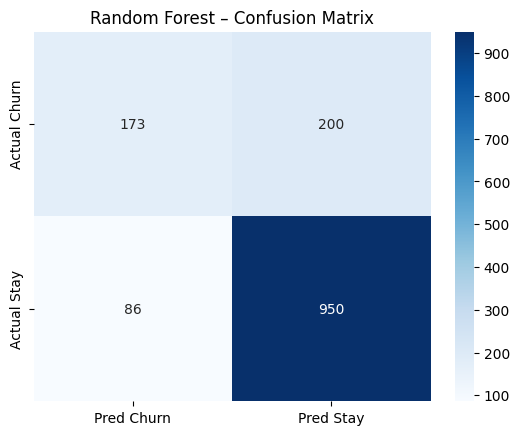

In [61]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Pred Churn', 'Pred Stay'],
            yticklabels=['Actual Churn', 'Actual Stay'])
plt.title('Random Forest – Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Predicted Churn Probability Distribution')

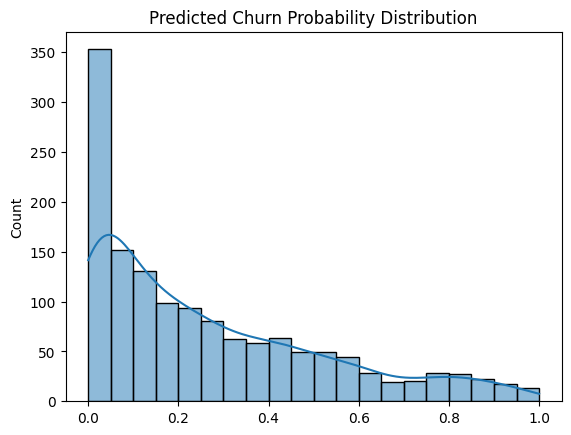

In [68]:
sns.histplot(y_prob, bins=20, kde=True)
plt.title('Predicted Churn Probability Distribution')


### ROC Curve – Random Forest

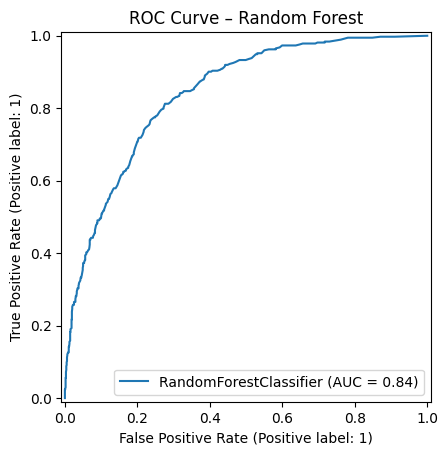

In [62]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('ROC Curve – Random Forest')
plt.show()

### Feature Importance – Random Forest

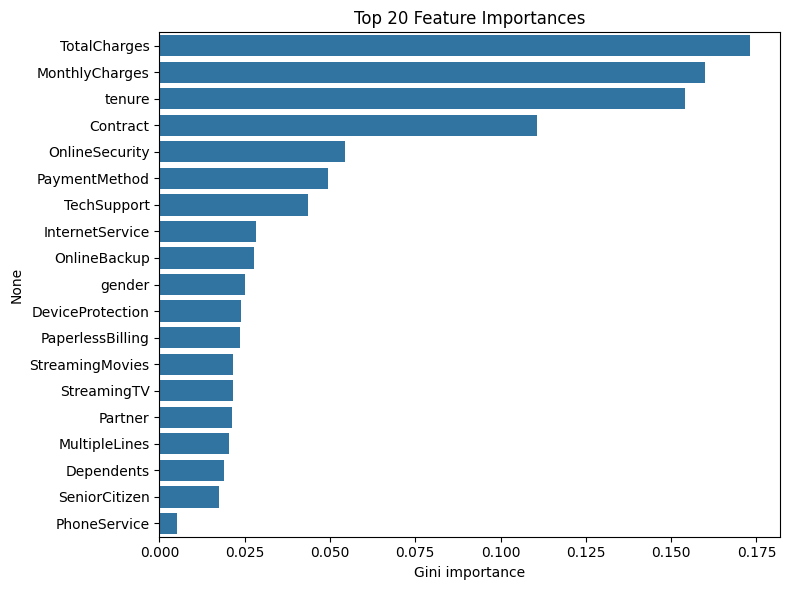

In [64]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top20 = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=top20.values, y=top20.index)
plt.title('Top 20 Feature Importances')
plt.xlabel('Gini importance')
plt.tight_layout()
plt.show()

### Save Trained Model

In [65]:
import joblib
joblib.dump(rf, 'random_forest_churn_model.pkl')

['random_forest_churn_model.pkl']

### Export Predicted CSV File

In [66]:
# Suppose you saved customer IDs separately
X_test_copy = X_test.copy()
X_test_copy['customerID'] = customer_ids  # e.g., a Series of IDs

# Now you can add predictions
X_test_copy['Actual_Churn'] = y_test.values
X_test_copy['Predicted_Churn'] = rf.predict(X_test)
X_test_copy['Churn_Probability'] = rf.predict_proba(X_test)[:, 1]

# Keep relevant columns
cols_to_keep = [
    "customerID",
    "SeniorCitizen",
    "tenure",
    "MonthlyCharges",
    "Actual_Churn",
    "Predicted_Churn",
    "Churn_Probability"
]

df_lite = X_test_copy[cols_to_keep]
df_lite.to_csv("churn_predictions_lite.csv", index=False)
